## Problem Statement:

Twitter data regarding the twitter user dog_rates has to be wrangled,analysed and visualized to gain insights about the data. Data had be gathered by multiple sources such as twitter archive given as a .csv file, twitter API and Image prediction file obtained by accessing a URL provided. Gathered data needs to be accessed and cleaned as it is both dirty and messy. Only after cleaning, the data becomes worthy enough for analysing and subsequent visualizing.

In [62]:
### Importing python packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import os

import warnings
warnings.filterwarnings('ignore')

In [63]:
# Importing InteractiveShell to allow viewing of results of multiple commands in a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [64]:
# Setting maximum number of rows and columns for display purpose

pd.set_option('display.max_rows',100)
pd.set_option('display.max.columns',150)

In [65]:
# Reading the data and placing it in twitter_enhanced df

twitter_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
twitter_enhanced.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [66]:
# Getting response from the URL
# Writing the response into images.tsv file

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('images.tsv', 'wb').write(response.content)

335079

In [67]:
# Reading the data from .tsv file and placing it in images df

images = pd.read_csv("images.tsv",sep = '\\t', encoding = 'UTF-8')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [68]:
# Developer Account request was unaccepted by Twitter, so using the data tweet_json.txt provided by Udacity 

'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_enhanced_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_enhanced_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)+

'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_enhanced_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_enhanced_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_

In [69]:
# Developer Account request was unaccepted by Twitter, so using the data tweet_json.txt provided by Udacity 

tweet_json = pd.read_json("tweet-json.txt",lines=True)
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [70]:
# Picking the columns necessary for analysis in tweet_json 

tweet_json = tweet_json[['id','retweet_count','favorite_count']]
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing the data
#### Checking the various attributes and noting them in the Observations made as a part of assessing the data.

In [71]:
twitter_enhanced.shape
twitter_enhanced.info()

(2356, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [72]:
#'name' column of twitter_enhanced consists of invalid values such as the,a,an,such. It can be noted that correct names are represented by starting Capital letter.
#Non capital letter beginning names must be replaced by None.

twitter_enhanced['name'].sample(10) 
twitter_enhanced['name'].tail(10)

16            Jim
955          Toby
1296        Rufus
1952    Shnuggles
423       Duchess
295       Vincent
1559        Frönq
2349           an
1772         None
545          Duke
Name: name, dtype: object

2346     the
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

In [73]:
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [74]:
twitter_enhanced['rating_denominator'].value_counts(normalize = True)

10     0.990238
11     0.001273
50     0.001273
80     0.000849
20     0.000849
2      0.000424
16     0.000424
40     0.000424
70     0.000424
15     0.000424
90     0.000424
110    0.000424
120    0.000424
130    0.000424
150    0.000424
170    0.000424
7      0.000424
0      0.000424
Name: rating_denominator, dtype: float64

In [75]:
# 'Source' column consists of <a= href> value, only text needs to be retained.

twitter_enhanced['source'].value_counts(normalize = True)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     0.942699
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        0.038625
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     0.014007
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    0.004669
Name: source, dtype: float64

In [76]:
# No missing values present in images, 2075 rows and 12 columns

images.info()
images.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [77]:
# No missing values present in tweet_json 2354 rows and 3 columns

tweet_json.info()
tweet_json.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Observations
### Quality Issues:
#### twitter_enhanced:
1. 78 rows containing non null value for 'in_reply_to_status_id' must be dropped, as we are interested in original tweets not replies.
2. 'timestamp' is object, must be in datetime format
3. 'Source' column consists of <a= href> value, only text needs to be retained.
4. 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' represents retweets, as we are interested in original tweets, not retweets, only null values of these columns are relevant for the analysis.
5. Total number of rows in twitter_enhanced is 2356, 'expanded_urls' have 2297 rows, 59 rows are missing.
6. Few rows having rating denominators that are not 10, those rows can be ignored
7. 'name' column of twitter_enhanced consists of invalid values such as the,a,an,such. It can be noted that correct names are represented by starting Capital letter. Non capital letter beginning names must be replaced by None.
8. Drop 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',‘in_reply_to_status_id' columns as they all contain only null values now.
9. Drop 'text' column as it's not used in my analysis
10. Dropping the rows where dog type is null in the merged dataset.


### Tidiness:
1. doggo, floofer, pupper, puppo are stored as different columns, must be brought together and put into one column - dog_stage_name
2. Rating is divided as numerator and denominator. Can be represented by a single column.
3. Images_df has predicted dog type and confidence level spread across multiple columns. All the predicted dog type should be brought under single column name dog_type. Same way, Confidence levels should be brought under a common name conf. Additional columns are dropped.
4. All 3 dataframes needs to be merged to obtain a file as single data source


### Data Cleaning

In [78]:
# Making the copy of original datasets before cleaning

twitter_enhanced_df = twitter_enhanced.copy()
images_df = images.copy()
tweet_json_df = tweet_json.copy()

In [79]:
# Finiding duplicated rows in twitter_enhanced df, none present.

twitter_enhanced_df[twitter_enhanced_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issues: twitter_enhanced_df
#### Define
#### 78 rows containing non null value for 'in_reply_to_status_id' must be dropped, as we are interested in original tweets not replies.

#### Code

In [80]:
twitter_enhanced_df = twitter_enhanced[twitter_enhanced_df['in_reply_to_status_id'].isnull()]

#### Test

In [81]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

#### Define
#### 'timestamp' is object, must be in datetime format

#### Code

In [82]:
twitter_enhanced_df['timestamp'] = pd.to_datetime(twitter_enhanced_df['timestamp'])

#### Test

In [83]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns, UTC]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns

#### Define
#### 'Source' column consists of <a= href> value, only text needs to be retained.

#### Code

In [84]:
twitter_enhanced_df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace = True)
twitter_enhanced_df['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace = True)
twitter_enhanced_df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace = True)
twitter_enhanced_df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace = True)


#### Test

In [85]:
twitter_enhanced_df['source'].value_counts()

Twitter for iPhone    2143
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

#### Define
#### 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' represents retweets, as we are interested in original tweets, not retweets, only null values of these columns are relevant for the analysis.

#### Code

In [86]:
twitter_enhanced_df = twitter_enhanced_df[twitter_enhanced_df['retweeted_status_id'].isnull()]

#### Test

In [87]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns, UTC]

#### Define
#### Total number of rows in twitter_enhanced is 2097 'expanded_urls' have 2094 rows, 3 rows are missing. Keep only the rows having non null values.

#### Code

In [88]:
twitter_enhanced_df = twitter_enhanced_df[~ twitter_enhanced_df['expanded_urls'].isnull()]

#### Test

In [89]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns, UTC]

#### Define
#### Few rows having rating denominators that are not 10, those rows can be ignored

#### Code

In [90]:
twitter_enhanced_df = twitter_enhanced_df[twitter_enhanced_df['rating_denominator'] == 10]
twitter_enhanced_df.shape

(2077, 17)

#### Test

In [91]:
twitter_enhanced_df['rating_denominator'].value_counts()

10    2077
Name: rating_denominator, dtype: int64

#### Define
#### 'name' column of twitter_enhanced consists of invalid values such as the,a,an,such. It can be noted that correct names are represented by starting Capital letter. Non capital letter beginning names must be replaced by None.

#### Code

In [92]:
for i in twitter_enhanced_df['name']:
      if i[0].isupper() != True:
            twitter_enhanced_df['name'].replace(i,'None',inplace = True)

#### Test

In [93]:
# None to display after conversion
for i in twitter_enhanced_df['name']:
      if i[0].isupper() != True:
            print(i)

In [94]:
twitter_enhanced_df['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2077, dtype: object

#### Define
#### Drop 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',‘in_reply_to_status_id' columns as they all contain only null values now.

In [95]:
twitter_enhanced_df['in_reply_to_status_id' ].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

#### Code

In [96]:
twitter_enhanced_df = twitter_enhanced_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test

In [97]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns, UTC]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 210.9+ KB


#### Define
#### Drop 'text' column as it's not used in my analysis

#### Code

In [98]:
twitter_enhanced_df = twitter_enhanced_df.drop(['text'], axis = 1)

#### Test

In [99]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns, UTC]
source                2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 194.7+ KB


## Tidiness

#### Define
#### doggo, floofer, pupper, puppo are stored as different columns, must be brought together and put into one column - dog_stage

#### Code

In [100]:
def melt_alternative(df):
    if df['doggo'] == 'doggo':
        return 'doggo'
    elif df['pupper'] == 'pupper':
        return 'pupper'
    elif df['floofer'] == 'floofer':
        return 'floofer'
    elif df['puppo'] == 'puppo':
        return 'puppo'
    else:
        return 'None'
twitter_enhanced_df['dog_stage'] = twitter_enhanced_df.apply(lambda x: melt_alternative(x), axis = 1)

#### Test

In [101]:
twitter_enhanced_df.head(2)
twitter_enhanced_df.shape
twitter_enhanced_df['dog_stage'].value_counts()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None


(2077, 12)

None       1742
pupper      220
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [102]:

twitter_enhanced_df.drop(['doggo','puppo','floofer','pupper'], axis = 1, inplace = True)
twitter_enhanced_df.shape

(2077, 8)

In [103]:
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns, UTC]
source                2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
dog_stage             2077 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 146.0+ KB


#### Define
#### Rating id divided as numerator and denominator. Can be represented by a single column.

In [104]:
twitter_enhanced_df['rating_denominator'].value_counts()

10    2077
Name: rating_denominator, dtype: int64

#### Code

In [105]:
# As denominator consists of 10 across all columns, placing numerator as the dog rating.
# Dropping rating_numerator and rating_denominator

twitter_enhanced_df['dog_rating'] = twitter_enhanced_df['rating_numerator']
twitter_enhanced_df.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)


#### Test

In [106]:
twitter_enhanced_df.head(2)

,tweet_id,timestamp,source,expanded_urls,name,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,Phineas,None,13
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13


#### Define
#### Images_df has predicted dog type and confidence level spread across multiple columns. All the predicted dog type should be brought under single column name dog_type. Same way, Confidence levels should be brought under a common name conf. Additional columns are dropped.

In [107]:
images_df.shape

(2075, 12)

#### Code

In [108]:
def dog_type_conf(images_df):
    if images_df['p1_dog'] == True:
        images_df['dog_type'] = images_df['p1']
        images_df['conf'] = images_df['p1_conf']
    elif images_df['p2_dog'] == True:
        images_df['dog_type'] = images_df['p2']
        images_df['conf'] = images_df['p2_conf']
    elif images_df['p3_dog'] == True:
        images_df['dog_type'] = images_df['p3']
        images_df['conf'] = images_df['p3_conf']
    else:
        images_df['dog_type'] = np.NaN
        images_df['conf'] = 0
    return images_df
images_df = images_df.apply(dog_type_conf,axis = 1) 

In [109]:
images_df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1, inplace = True)
images_df.head()

,tweet_id,jpg_url,img_num,dog_type,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Test

In [110]:
images_df.head(2)

,tweet_id,jpg_url,img_num,dog_type,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826


#### Define
#### Dropping the rows where dog type is null.

In [111]:
images_df[images_df['dog_type'].isnull()]

,tweet_id,jpg_url,img_num,dog_type,conf
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,0.0
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,NaN,0.0
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,NaN,0.0
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,NaN,0.0
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,NaN,0.0
...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,NaN,0.0
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,NaN,0.0
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,NaN,0.0
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,0.0


#### Code

In [112]:
images_df.shape
images_df = images_df[~images_df['dog_type'].isnull()]
images_df.shape

(2075, 5)

(1751, 5)

#### Test

In [113]:
images_df[images_df['dog_type'].isnull()]

,tweet_id,jpg_url,img_num,dog_type,conf


#### Define
#### All 3 dataframes needs to be merged to obtain a file as single data source. Joined on tweet_id.

#### Code

In [114]:
twitter_combined_df = pd.merge(twitter_enhanced_df, images_df, how = 'inner', on = 'tweet_id')
twitter_combined_df.head(3)
twitter_combined_df.shape

,tweet_id,timestamp,source,expanded_urls,name,dog_stage,dog_rating,jpg_url,img_num,dog_type,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,Archie,None,12,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,Darla,None,13,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086


(1650, 11)

In [115]:
## Renaming id as tweet_id for joining twitter_combined_df,tweet_json_df.

tweet_json_df.rename(columns = {'id':'tweet_id'},inplace = True)

In [116]:
twitter_combined_df = pd.merge(twitter_combined_df,tweet_json_df,how = 'inner', on = 'tweet_id' )

#### Test

In [117]:
twitter_combined_df.shape
twitter_combined_df.info()

(1650, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 13 columns):
tweet_id          1650 non-null int64
timestamp         1650 non-null datetime64[ns, UTC]
source            1650 non-null object
expanded_urls     1650 non-null object
name              1650 non-null object
dog_stage         1650 non-null object
dog_rating        1650 non-null int64
jpg_url           1650 non-null object
img_num           1650 non-null int64
dog_type          1650 non-null object
conf              1650 non-null float64
retweet_count     1650 non-null int64
favorite_count    1650 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(6)
memory usage: 180.5+ KB


In [118]:
twitter_combined_df.shape

(1650, 13)

### Exporting the cleaned dataframe as Master.csv file

In [119]:
twitter_combined_df.to_csv('.\Master.csv')

In [120]:
twitter_combined_df.head(2)

,tweet_id,timestamp,source,expanded_urls,name,dog_stage,dog_rating,jpg_url,img_num,dog_type,conf,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,Archie,None,12,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461


### Univariate Visualization

#### 1. Which is the rating given to dogs by most tweeples?

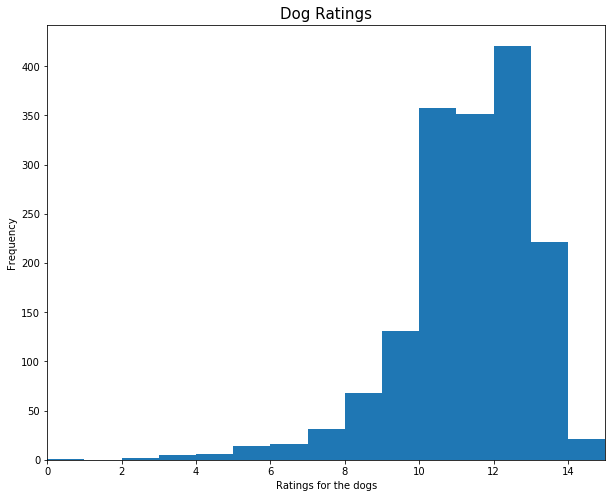

In [121]:
plt.figure(figsize = (10,8))
binned = np.arange(0,twitter_combined_df['dog_rating'].max(),1)
plt.hist(twitter_combined_df['dog_rating'], bins = binned);
plt.xlabel('Ratings for the dogs')
plt.ylabel('Frequency')
plt.title('Dog Ratings', fontsize = 15)
plt.xlim(0,15);

#### 2. Distribution of dog_stage column

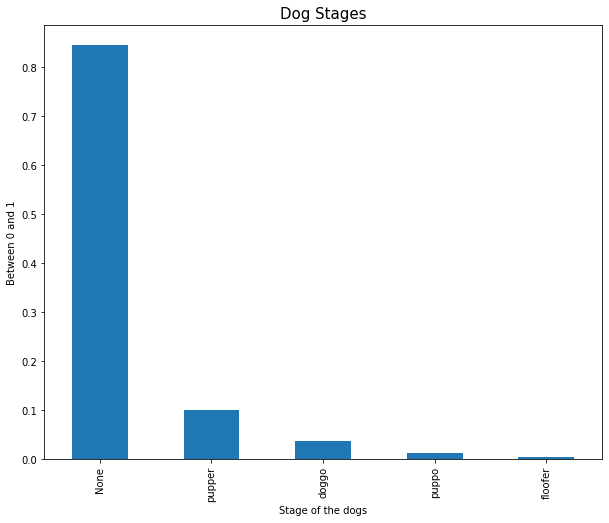

In [122]:
plt.figure(figsize = (10,8))
plt.xlabel('Stage of the dogs')
plt.ylabel('Between 0 and 1')
plt.title('Dog Stages', fontsize = 15)
twitter_combined_df['dog_stage'].value_counts(normalize = True).plot.bar();
twitter_combined_df['dog_stage'].value_counts(normalize = True);

#### 3. What is the popular platform used for tweeting?

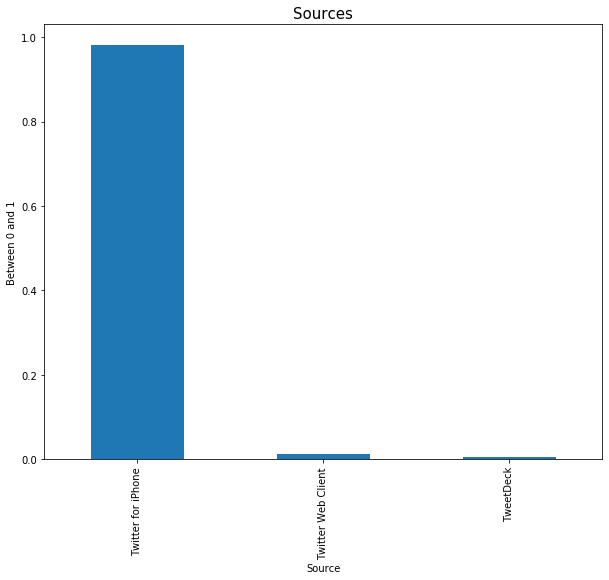

In [123]:
plt.figure(figsize = (10,8))
plt.xlabel('Source')
plt.ylabel('Between 0 and 1')
plt.title('Sources', fontsize = 15)
twitter_combined_df['source'].value_counts(normalize = True).plot.bar();

### Observations:
1.	Most tweeples have given 12 rating for the dogs. Dogs are so adorable and they are rated 13 out of 10 for their extra cuteness.
2.	Around 85% of tweets are without dog stage names, but based on the ones which have been mentioned, puppers seem to be popular.
3.	Popular source for tweeting is twitter for iPhone. It’s justified as most of us, prefer tweeting through our phones which are handy and can be accessed almost immediately.

### Bivariate Analysis

#### 1. Which is the favorite dog of tweeples based on favorite_count and retweet_count? 

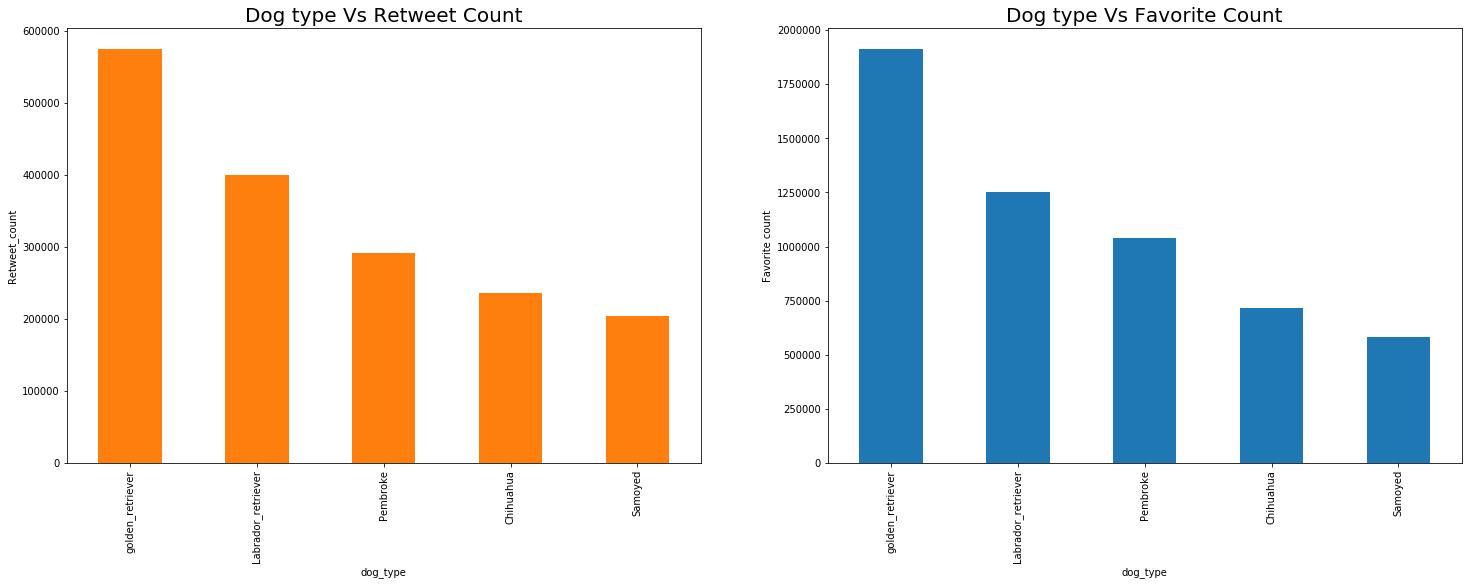

In [124]:
plt.figure(figsize = (25,8))
plt.subplot(121)
plt.xlabel('Dog type')
plt.ylabel('Retweet_count')
plt.title('Dog type Vs Retweet Count', fontsize = 20)
top_5 = twitter_combined_df.groupby(['dog_type'])['retweet_count'].sum();
top_5.sort_values(ascending = False).head(5).plot.bar(color = sns.color_palette()[1]);

plt.subplot(122)
plt.xlabel('Dog type')
plt.ylabel('Favorite count')
plt.title('Dog type Vs Favorite Count', fontsize = 20)
com = twitter_combined_df.groupby(['dog_type'])['favorite_count'].sum()
com.sort_values(ascending = False).head(5).plot.bar();
plt.xticks(rotation = 90);

#### 2. Which dog is described well by the confidence instilled by the model?

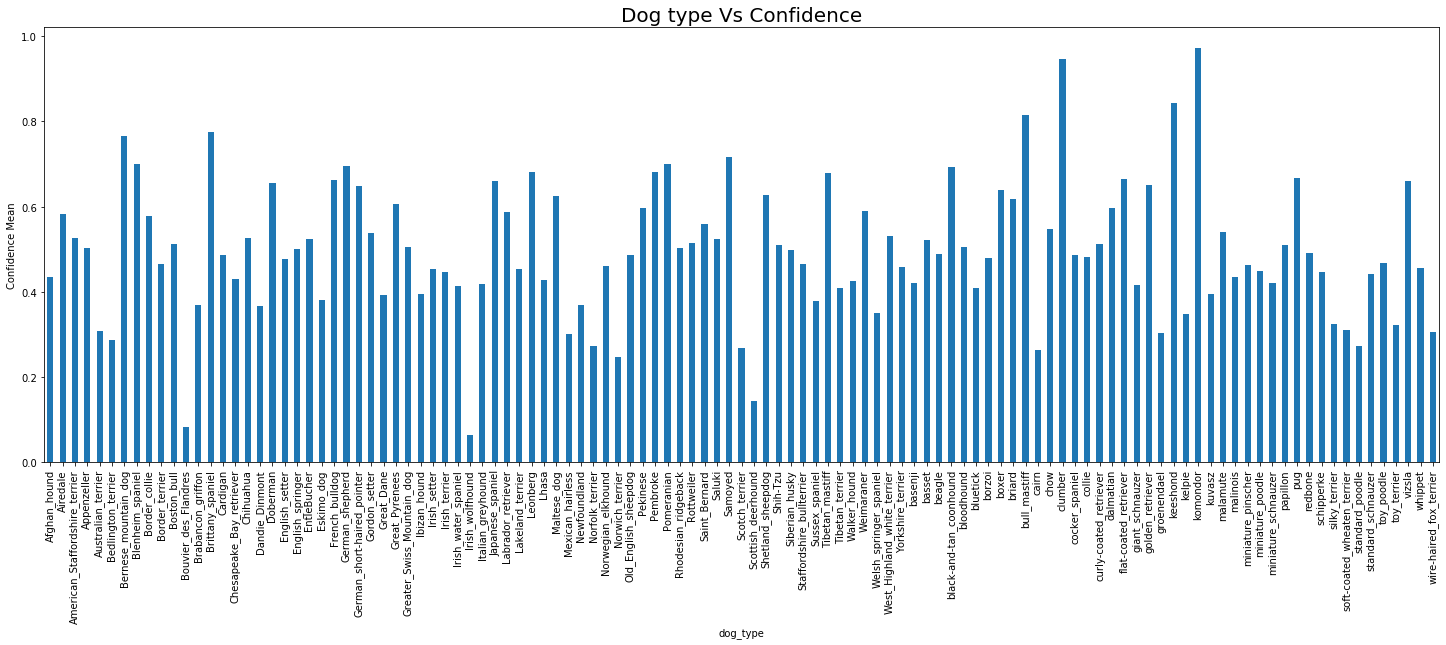

In [125]:
plt.figure(figsize = (25,8))
plt.xlabel('Dog type')
plt.ylabel('Confidence Mean')
plt.title('Dog type Vs Confidence', fontsize = 20)
twitter_combined_df.groupby(['dog_type'])['conf'].mean().plot.bar();
plt.xticks(rotation = 90);

#### 3. What is the relationship between retweet_count and favorite_count?

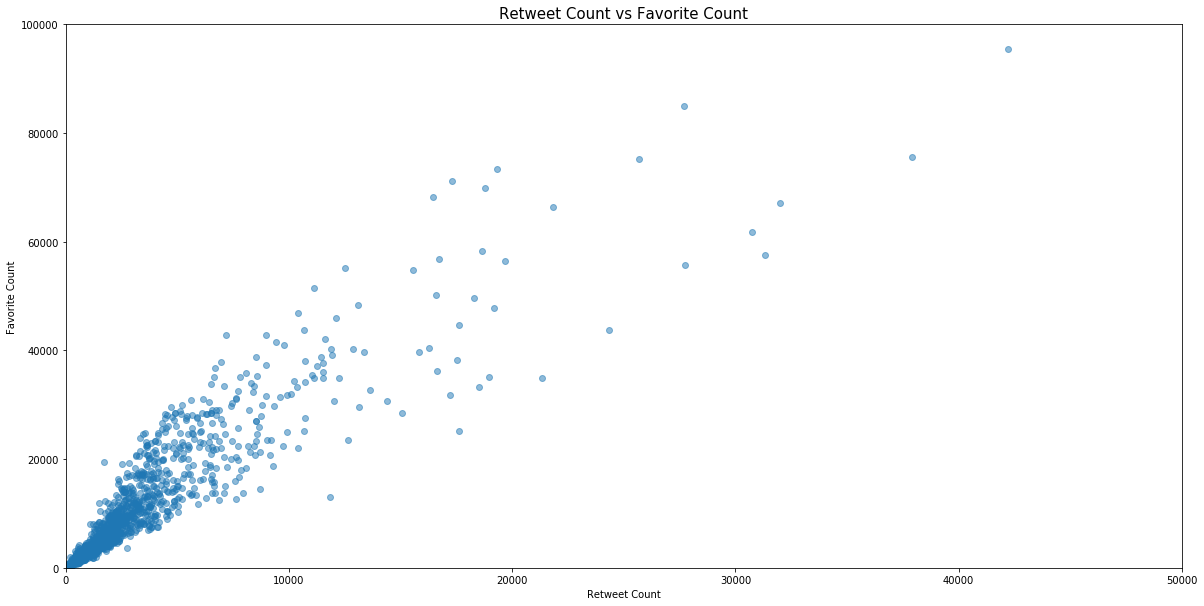

In [126]:
plt.figure(figsize = [20,10])
plt.ylabel('Favorite Count')
plt.xlabel('Retweet Count')
plt.title('Retweet Count vs Favorite Count', fontsize = 15)
plt.scatter(x = 'retweet_count', y = 'favorite_count', data = twitter_combined_df, alpha = 0.5);
plt.xlim(0,50000)
plt.ylim(0,100000);

### Observations:
1.	Based on favourite count as well as retweet count Golden retriever is the most liked dog type. 
2.	Komondor dog breed is identified by the model with 98% confidence. These dogs generally have log fur unless groomed well.
    Irish wolfhound is identified poorly. Model needs to be trained with additional data for this dog breed to make a better decision.
3. Retweet count and favourite counts are positively correlated. As retweets increase, popularity and thus those images are starred as most favourite by the tweeples.
